In [41]:
import pickle
import pandas as pd
import numpy as np
import re
from pprint import pprint

from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# import necassary files for visualizations
path_lda = '/Users/cmeaton/Documents/code/ds/METIS/sea19_ds7_workingdir/project_4/src/models/pickled_model_output/lda_model_file_11.sav'
path_id2word = '/Users/cmeaton/Documents/code/ds/METIS/sea19_ds7_workingdir/project_4/src/models/pickled_model_output/id2word_11.sav'
path_corpus = '/Users/cmeaton/Documents/code/ds/METIS/sea19_ds7_workingdir/project_4/src/models/pickled_model_output/corpus_11.sav'

lda_model = pickle.load(open(path_lda, 'rb'))
id2word = pickle.load(open(path_id2word, 'rb'))
corpus = pickle.load(open(path_corpus, 'rb'))

### pyLDAvis visualization

In [8]:
## Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/cmeaton/anaconda3/envs/dream_cluster/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.368450  0.076457       1        1  51.683853
5      0.180355 -0.273263       2        1  10.977075
1      0.161849  0.300073       3        1   8.341488
10     0.051576 -0.111379       4        1   6.437903
6      0.021736 -0.109732       5        1   6.077277
3     -0.077766 -0.064066       6        1   3.985633
0     -0.110632  0.072990       7        1   3.253189
2     -0.148450  0.018887       8        1   2.715994
9     -0.150309  0.032669       9        1   2.465191
4     -0.148016  0.025073      10        1   2.259664
7     -0.148793  0.032292      11        1   1.802730, topic_info=      Category         Freq         Term        Total  loglift  logprob
56     Default  1782.000000         room  1782.000000  30.0000  30.0000
287    Default  3000.000000         time  3000.000000  29.0000  29.0000
207    Default  1235.000000         door  1235.000000  28.0000  28.0000
15     Default   821.000000          car   821.000000  27.0000  27.0000
373    Default   990.000000       always   990.000000  26.0000  26.0000
107    Default  1485.000000         life  1485.000000  25.0000  25.0000
362    Default   853.000000        sleep   853.000000  24.0000  24.0000
74     Default  1676.000000         walk  1676.000000  23.0000  23.0000
160    Default  1613.000000        house  1613.000000  22.0000  22.0000
465    Default  1092.000000         year  1092.000000  21.0000  21.0000
246    Default   840.000000        night   840.000000  20.0000  20.0000
36     Default  1601.000000       happen  1601.000000  19.0000  19.0000
249    Default   841.000000         open   841.000000  18.0000  18.0000
266    Default  2504.000000     remember  2504.000000  17.0000  17.0000
113    Default  1383.000000        never  1383.000000  16.0000  16.0000
216    Default  3069.000000         feel  3069.000000  15.0000  15.0000
341    Default   883.000000          guy   883.000000  14.0000  14.0000
924    Default   557.000000         kill   557.000000  13.0000  13.0000
73     Default  2769.000000         wake  2769.000000  12.0000  12.0000
818    Default   479.000000       school   479.000000  11.0000  11.0000
11     Default   719.000000        black   719.000000  10.0000  10.0000
584    Default   423.000000        drive   423.000000   9.0000   9.0000
190    Default   806.000000         body   806.000000   8.0000   8.0000
70     Default  2093.000000         tell  2093.000000   7.0000   7.0000
290    Default  1132.000000         turn  1132.000000   6.0000   6.0000
240    Default   592.000000        light   592.000000   5.0000   5.0000
158    Default  1003.000000         head  1003.000000   4.0000   4.0000
568    Default   494.000000        water   494.000000   3.0000   3.0000
167    Default   497.000000    nightmare   497.000000   2.0000   2.0000
71     Default  1919.000000        thing  1919.000000   1.0000   1.0000
...        ...          ...          ...          ...      ...      ...
580    Topic11   107.267426        couch   108.009583   4.0090  -4.0706
816    Topic11    89.512360        uncle    90.254486   4.0076  -4.2515
6664   Topic11    71.024818       tongue    71.766937   4.0055  -4.4829
2499   Topic11    70.220543        offer    70.962700   4.0054  -4.4943
16610  Topic11    64.461227        jacky    65.203674   4.0044  -4.5798
697    Topic11    63.245251       remain    63.987450   4.0042  -4.5989
3319   Topic11    55.142075      speaker    55.884274   4.0025  -4.7360
692    Topic11    52.398289         hate    53.140427   4.0018  -4.7870
2641   Topic11    51.874680       online    52.616825   4.0017  -4.7971
420    Topic11    48.929813         dull    49.672180   4.0008  -4.8555
4093   Topic11    39.937016          jaw    40.679188   3.9975  -5.0586
155    Topic11    37.261555  grandfather    38.003708   3.9961  -5.1279
2787   Topic11    37.178139         grip    37.920338   3.9961  -5.1302
3203   Topic11 

### Wordcloud

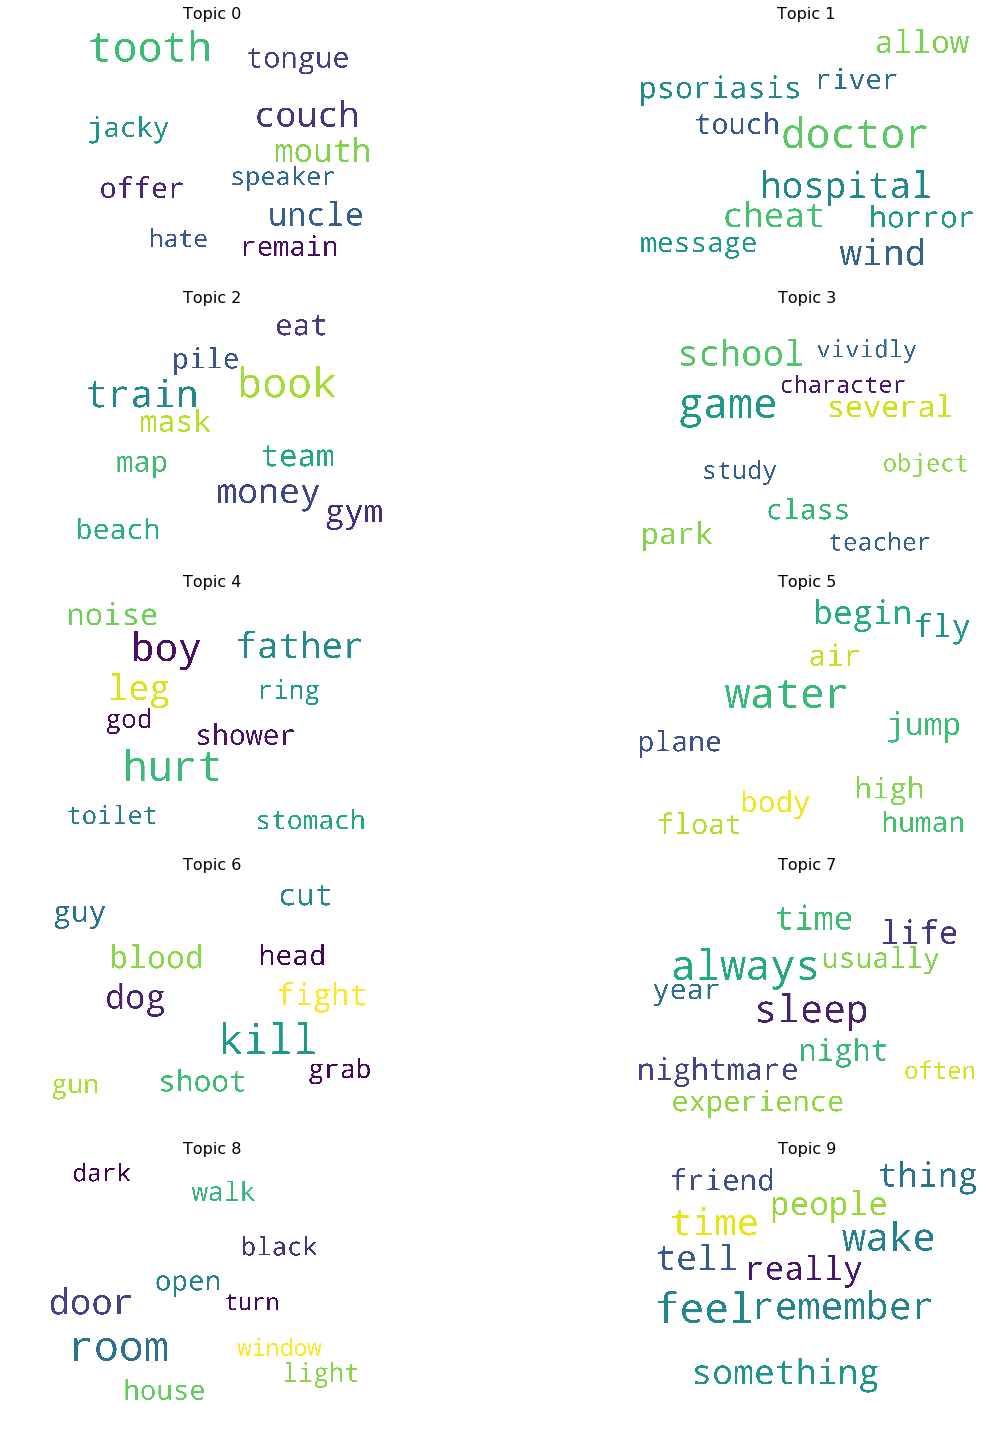

In [33]:
# 1. Wordcloud of Top N words in each topic
stop_words = stopwords.words('english')
new_stop_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know',
                   'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see',
                   'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even',
                   'right', 'line', 'even', 'also', 'may', 'take', 'come', 'look', 'back', 'start', 'going', 
                  'doing', 'what','whats', 'pron', 'dream']
stop_words.extend(new_stop_words)
    
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                background_color='white',
                width=2500,
                height=1800,
                max_words=10,
                #colormap='Blues',
                #color_func=lambda *args, **kwargs: cols[i],
                #color_func=random_color_func,
                prefer_horizontal=1.0)


topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
    


### tSNE Topic Cluster

In [121]:
# source = ColumnDataSource(t)

# TOOLTIPS = [
#     ("index", "$index"),
#     ("(x,y)", "($x, $y)"),
#     ("topic", "@topics")]

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 11
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=800, plot_height=600)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4489 samples in 0.204s...
[t-SNE] Computed neighbors for 4489 samples in 0.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4489
[t-SNE] Computed conditional probabilities for sample 2000 / 4489
[t-SNE] Computed conditional probabilities for sample 3000 / 4489
[t-SNE] Computed conditional probabilities for sample 4000 / 4489
[t-SNE] Computed conditional probabilities for sample 4489 / 4489
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.645775
[t-SNE] KL divergence after 1000 iterations: 1.297235


Loading BokehJS ...

/Users/cmeaton/anaconda3/envs/dream_cluster/lib/python3.7/site-packages/bokeh/core/property/container.py:102: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))


In [35]:
from yellowbrick.text import UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.datasets.utils import load_corpus

# Load the data and create document vectors
corpus = load_corpus(corpus)
tfidf  = TfidfVectorizer()
docs   = tfidf.fit_transform(corpus.data)
labels = corpus.target

umap   = UMAPVisualizer()
umap.fit(docs,labels)
umap.poof()

In [45]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline




In [46]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [83]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


In [120]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(y)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=lda_model[corpus], s=0.1, cmap='Spectral');

/Users/cmeaton/anaconda3/envs/dream_cluster/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 616 separate connected components using meta-embedding (experimental)
  n_components
/Users/cmeaton/anaconda3/envs/dream_cluster/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [107]:
x = np.asarray(corpus)

In [118]:
combined = [item for sublist in corpus for item in sublist]
y = np.array(combined)